<a href="https://colab.research.google.com/github/dexbatmon97/dexie-react/blob/master/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erick Fernando Villa Rodriguez

Student Number 0584866

Option 2

Techniques of Artificial Intelligence


**Introduction**

This project was the first to sneak out into a machine learning code. The Mushroom classification dataset was used, and the algorithms used to classify the mushrooms as edibles or not were the  KNN(nonlinear)and the Naive Bayes (linear).

I wanted to highlight the difference in performance between linear and nonlinear algorithms. My theory before having any knowledge was that there is some linear dataset and some that are not. Therefore I would train my model with the two types of algorithms and after I would analyze the dataset to know is linear or not. The best performance model should match the characteristic of linearity or nonlineality of the algorithms. Basically, if it is a linear dataset Naive Bayes should be better, otherwise, KNN will have a better performance



**Dataset**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

Source https://www.kaggle.com/uciml/mushroom-classification

The dataset provides categorical data which is data divided into groups or categories. These categories are based on qualitative characteristics 

About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d







First we import all the libraries needed to train the model

In [ ]:
import numpy as np
import seaborn as sns 
np.random.seed(42)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

we read the CSV file from the document and see all the values in a table 8124 rows × 23 columns every parameter has about 2 to 9 possible classification and it is indicated with a letter related to the qualitative feature

In [ ]:
df = pd.read_csv('/content/mushrooms.csv', sep="," ,header = 0)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


There is one column that has all missing values so we drop that unmeaningful data

In [ ]:
df = df.drop(["veil-type"],axis=1)

checking parameters and number of values 

In [ ]:
print(df.shape)

(8124, 22)


At the end we alre left with all this parameters

In [ ]:
df.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

And this time there is no missing values

In [ ]:
df.isna().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

It is important to see that the classification of data is well distributed otherwise the model would just learns the exceptions. The parity in our classes is well distributed and we can continue with out model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


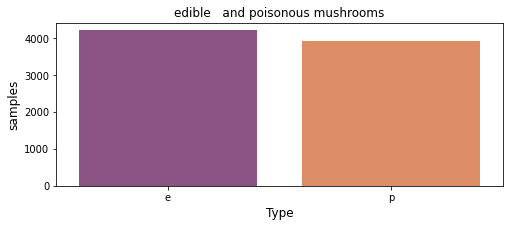

In [ ]:
count = df['class'].value_counts()
plt.figure(figsize=(8,3))
sns.barplot(count.index, count.values, alpha=0.8, palette="inferno")
plt.ylabel('samples', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('edible   and poisonous mushrooms')
plt.show()

**Methodology**

As we explained the project aims to know about the linearity or nonlinearity of the data set, so first we need to dive a little into the theory of this

Linear data is data that can be represented on a line graph. This means that there is a clear relationship between the variables and that the plotted information will be represented in an straight line. Non-linear data, on the other hand, cannot be represented on a line graph. This is because there is no clear relationship between the variables and representation in the graph will be curved.

In the left side of the following image we can see an example of a linear relationship while on the right side there is a non linear relationship where there is not a clear correaltion between the x and y axis. But it is not always as straightforward to get an idea of a function is linear or not from a graph.

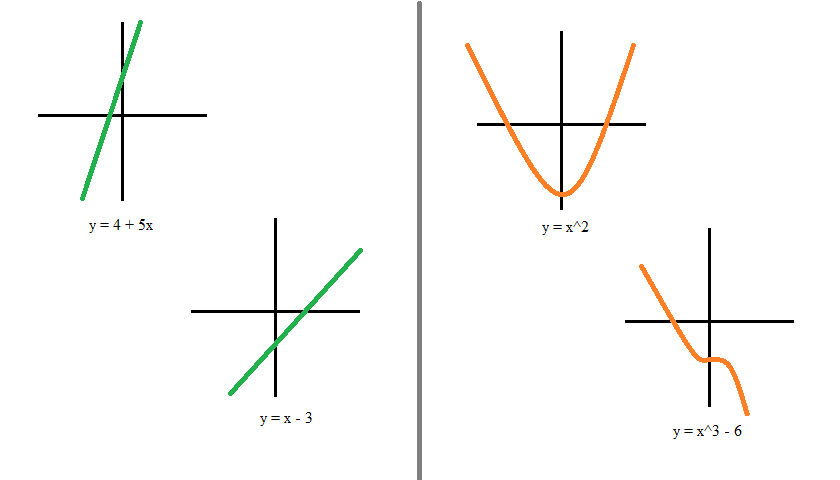

A linear function follows the principle of input/output = constant. Usually to find the type of dataset that we are handling the idea is to apply simple linear regression to the dataset and then to check least square error. If the least square error shows high accuracy, it implies the dataset being linear in nature, else dataset is non-linear.

Our dataset  is categorical data for which it does not makes sense to calculate a mean or variance. It do not posses a equation that fits the form Y= a + bX, where Y is the dependent variable , X is the independent variable, b is the slope of the line and a is the y-intercept.

So when we started or defined the project we did not have this data but now we know that there is no possiblity a categorical data set could be linear when the class atributes depends of 21 features (because we erase one). However we can further demonstrate this by using a heatmap to show whats the relationship between all this features and still analize more the behaviour of our dataset

Our dataset is categorical data for which it does not makes sense to calculate a mean or variance. It does not possess an equation that fits the form Y= a + bX, where Y is the dependent variable, X is the independent variable, b is the slope of the line and a is the y-intercept.

In [ ]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

After encoding each column was assigned with a number instead of its string label, but the numerical values between different columns have no relationship between each other 

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


As said after applying the label encoder we ended up with features represented in the columns and the numerical value of the samples but this is not enough still to train a model. We will use the standard Scaler features to transform your data such that its distribution will have a mean value of 0 and standard deviation of 1 independently for each column of the data


This is useful when you want to compare data that correspond to different units. In that case, you want to remove the units. To do that in a consistent way of all the data, you transform the data in a way that the variance is unitary and that the mean of the series is 0. Thus all our data ended up normalized or standardized

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['class']
X = df.drop('class', axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


Now that our data follows a standardization we will look for the correlation between the features of our dataset and the class. Correlation is a statistical term describing the degree to which two variables move in coordination with one another. For that, we will represent the correlation between all-out features in a heatmap for a better representation

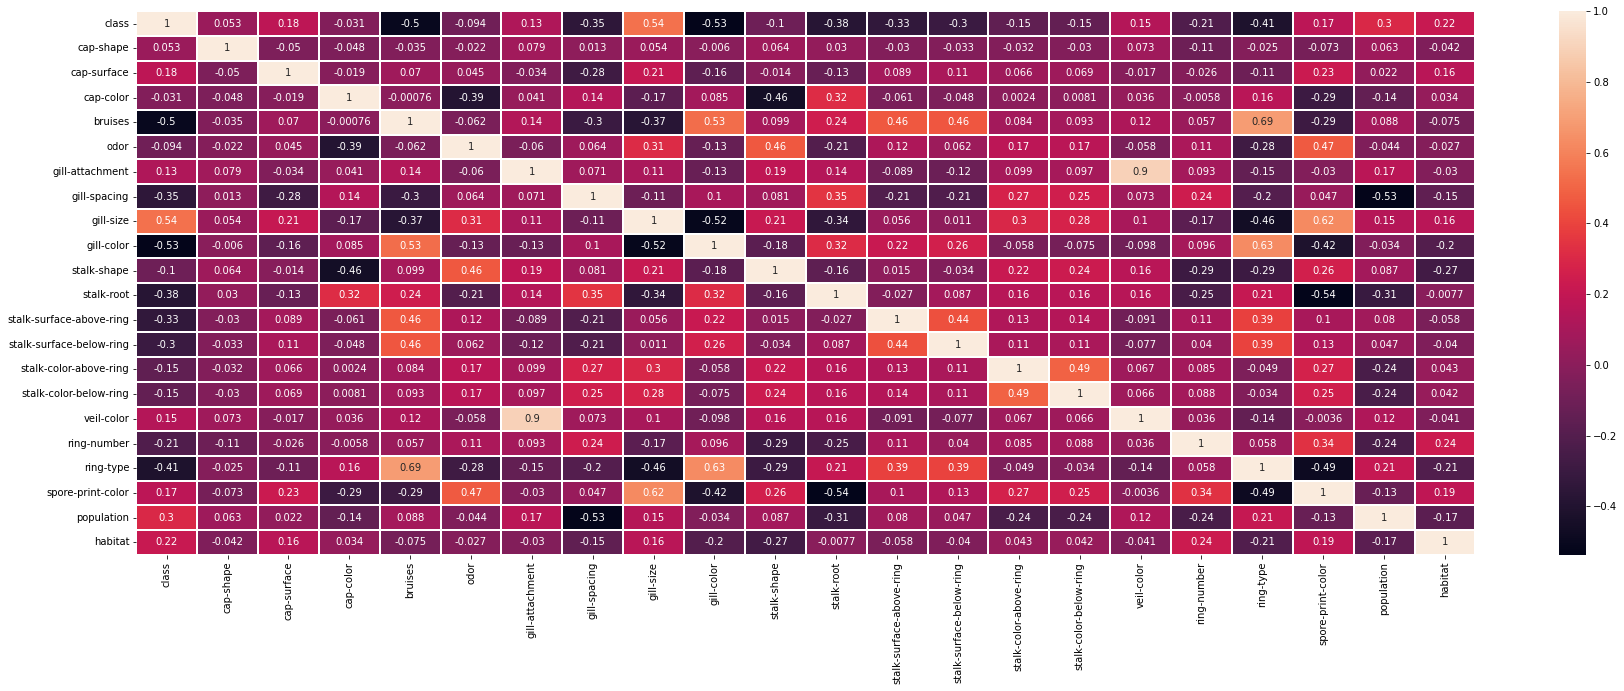

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr,linewidth = 1 , annot = True)
plt.show()

With the previous visualization it can be noted that there is no dominating feature, nothing bring a strong correlation, meaning all aspects contribute to the model and no single feature predicting

# **sklearn**

Before discussing the training methods, the library users will be discussed, Sklearn is a python library for data processing, it can be helpful for classification problems like the one discussed in this project.
The user has to import the specific model that he wants to use to generate accurate results for the prediction, after the model selection the model is trained with the dataset and then the model is tested with new data to evaluate its efficiency.

**Training the model**

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

The dataset is divided into two parts, the feature matrix and the response vector. TFeature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. 

The train-test split function is the most important in the first parameter the user must introduce a dataset divided into features labels (x) and final label (y), y is dependent on x of course. Then the user must select either the training or test size 

In [ ]:
# "class" column as numpy array.
y = df["class"].values
# All data except "class" column.
x = df.drop(["class"], axis=1).values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**Methods**

As said now we start the training and we import the models that we will use to train our model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

**KNN(non linear)**

K nearest Neighbors is one of the easiest machine learning algorithms it is based on supervised learning where the labeled input and data allow training of the algorithm into classifying data or predict outcomes. In this type, there are two types of problems classification and regression detection, both of them train databases to recognize patterns to assign the target correspondences. This algorithm assumes similarity between new data and previous ones and put them into the most similar c

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

k value indicates the count of the nearest neighbors. We have to compute distances between test points and trained labels points.

Usually a small value of k is set, to graphically see how the perforamce of knn change according to the value K there is the following plot however it is kust to justify the selection of K, the evaluation will be made later

In [ ]:
pointsy=[]
pointsy = [0 for i in range(10)] 
#setting from 1 to 10 K
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    #evaulation of results according to variable neighbors
    pointsy[i]=knn.score(x_test,y_test)
plt.plot(range(10),pointsy)
plt.xlim((1,9))
plt.ylim((0.995,1))
plt.show()

from this the graph we can prove ta the best value ok K is 1 

In [ ]:
#trainign fo the model with KNN  with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

**Naive Bayes (linear)**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem that is about finding the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

image.png

where A and B are events and P(B) ≠ 0.

Basically the algortihm tries to find the probabilty of an event A, given the event B is true. Event B is also termed as evidence.

P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

About the the naive approach, it states the presence of a particular feature in a class is unrelated to the presence of any other feature

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

In [ ]:
# training of the model with Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)

**Evaluation**

The trained model is tested with a the test data that is still unseen by it, labeled data will be compared with its own predictions. This evaluation performance tells us how well and accurate the model is.

In [ ]:
print("Test Accuracy bayes: {}%".format(round(nb.score(x_test,y_test)*100,2)))
print("Test Accuracy knn: {}%".format(round(knn.score(x_test,y_test)*100,2)))

In [ ]:
#knn.score(x_test,y_test)

From here we could assume that indeed as our dataset is non linear the knn is almost perfect for our model, however we can still look deeper into our results

**Confusion Matrix**

Confusion matrix is a tabular visualization of the model predictions versus the ground-truth labels. Rows represent the instances in a predicted class and column represents the instances in an actual class.

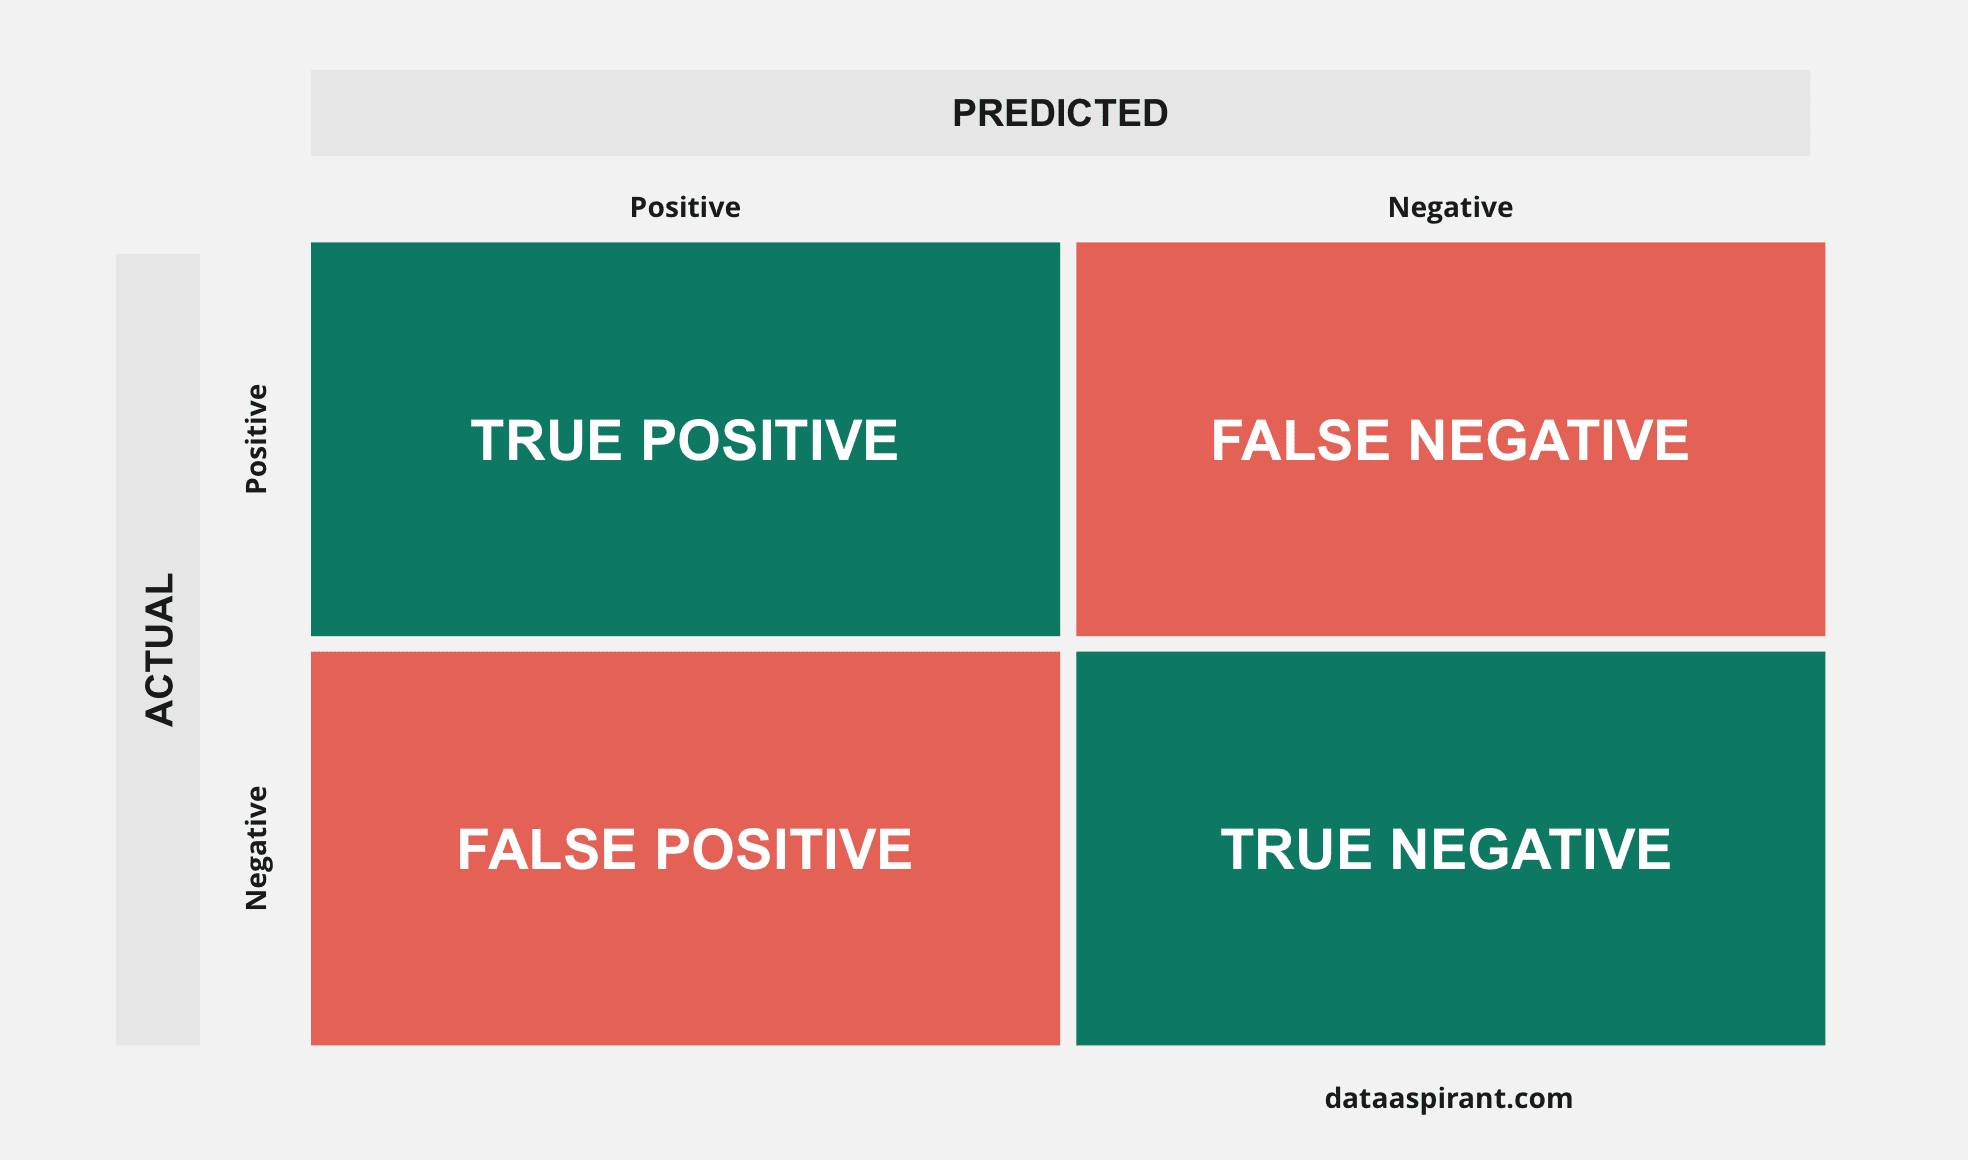

Fist we take a look into the KNN

In [ ]:
from sklearn.metrics import confusion_matrix
# knn
#predicted data
y_predknn = knn.predict(x_test)
#true data
y_trueknn = y_test

cm = confusion_matrix(y_trueknn, y_predknn)
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

From here we can say that the number of false positive and negative is almost neglectable 

In [ ]:
print("KNN Classifier report: \n\n", classification_report(y_test, y_predknn))

Now lets take a look into Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix
# NB
y_pred = nb.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("true label")
plt.show()

The data is not that bad but considerable less acurrate than knn

In [ ]:
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred))



*   F1 score – What percent of positive predictions were correct
*   Recall – What percent of the positive cases did you catch
*   Precision – Accuracy of positive predictions.










*   weighted average (averaging the support-weighted mean per label)
*   macro average (averaging the unweighted mean per label)
*   TP – True Positives






cross validation 

The last metric to validate out method is croos validatiosn, if the user do not use this mehod we would have to have at least 3  different datasets. The first to train the dataset. The second is a validation dataset that is used to assess how all of your candidate models perform on unseen data to help decide between them. The third is a pure test dataset 

In the K-Fold Cross-Validation approach, the dataset is split into K folds. Every iteration a different testing fold is created and the remaining is train data, along the iteration the test fold changes until the kth iteration and the accuracy obtained in each iteration is used to derive the overall average accuracy for the model

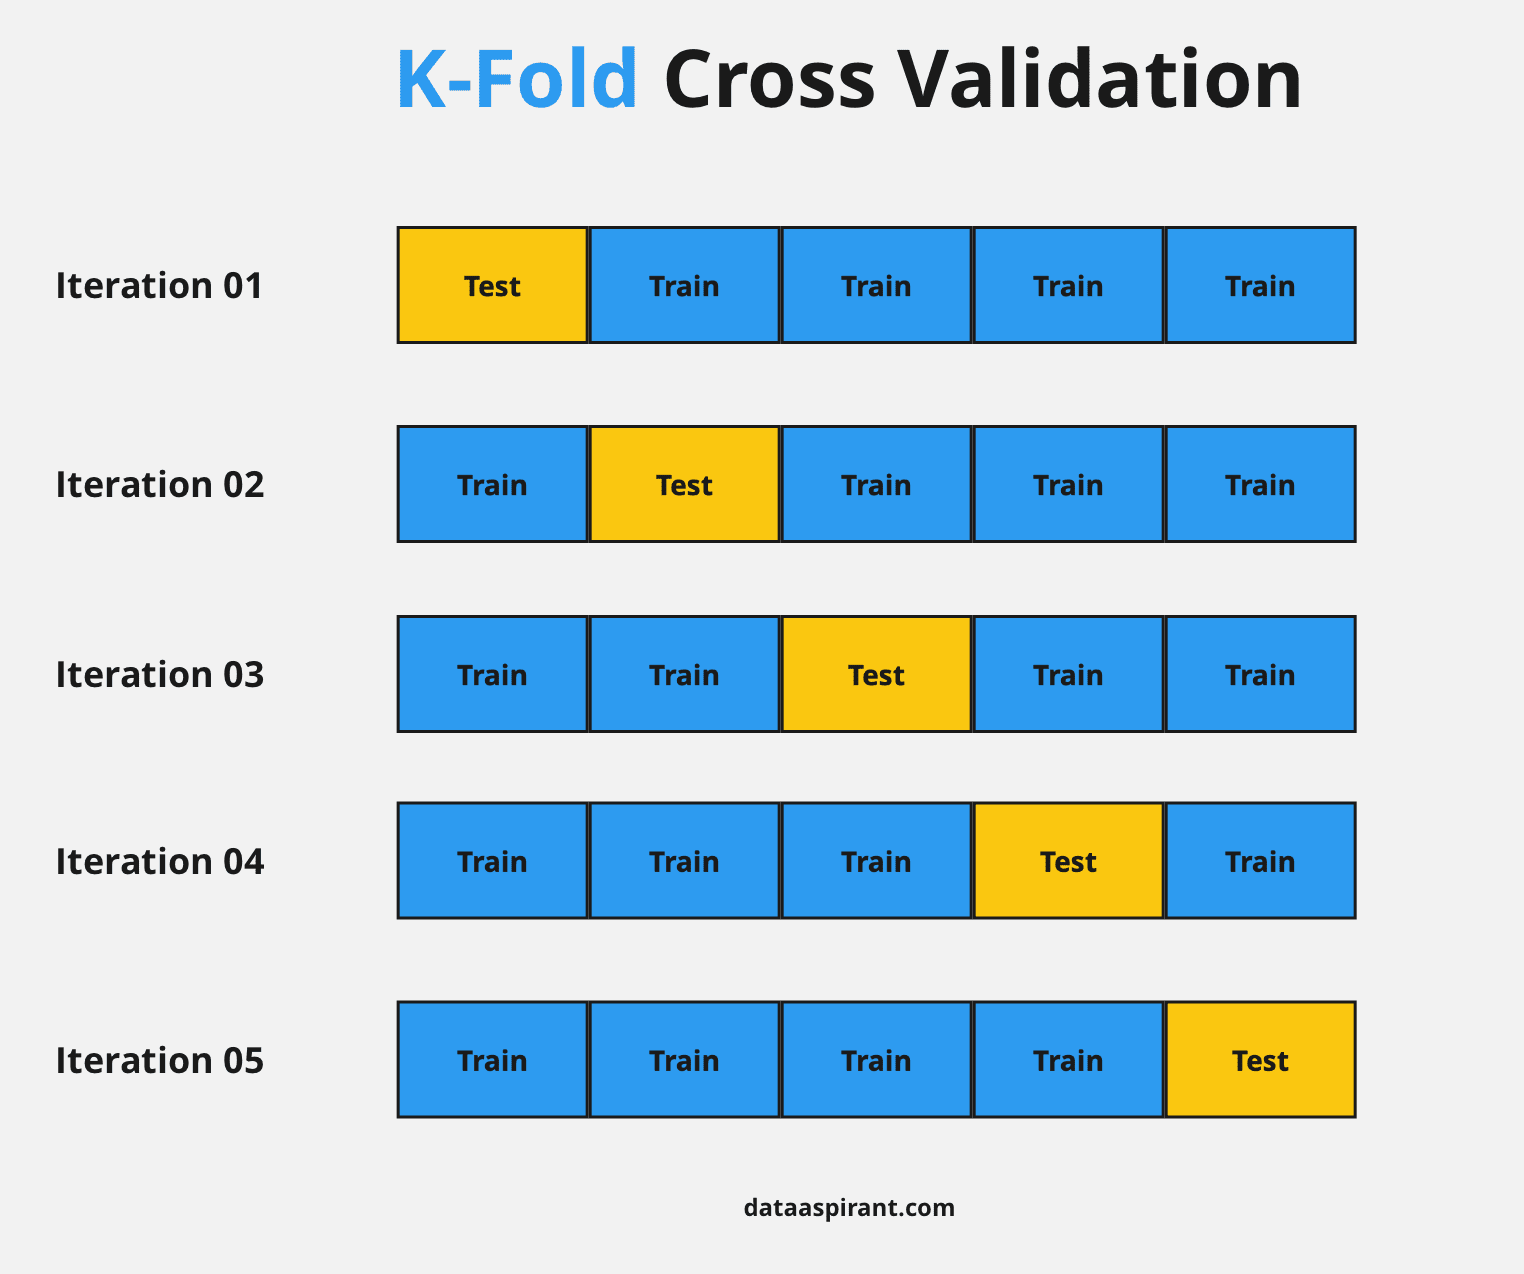

The only disadvantage is the processing time as it has to iterate K times consuming more resources and if the data set is imbalance would not give good results but we already show that our dataset is correct. This is because some folds may have just a few or no records for the minority class.

Now we will show the result for bayes and knn with 10 to 50 k folds

In [ ]:
from sklearn.model_selection import cross_val_score

#setting y axis for plotting
pointsy=[]
pointsy = [0 for i in range(50)] 

#importinf the model
model=GaussianNB()

#iteration of k folds
for i in range(10,50):
   
   kfold_validation=KFold(i)
   results=cross_val_score(model,x_test,y_test,cv=kfold_validation)
   pointsy[i]=np.mean(results)

plt.plot(range(50),pointsy)
plt.ylim((0.87,0.885))
plt.xlim((11,49))
plt.show()

In [ ]:
model=KNeighborsClassifier()
pointsy=[]
pointsy = [0 for i in range(50)] 
for i in range(10,50):
   kfold_validation=KFold(i)
   results=cross_val_score(model,x_test,y_test,cv=kfold_validation)
   pointsy[i]=np.mean(results)

plt.plot(range(50),pointsy)
plt.xlim((11,49))
plt.ylim((0.9865,0.993))
plt.show()

**Discussion**

The iteration of 10 to 50 folds was done to evaluate how the accuracy of our model varies with different amounts of unseen data, the Bayes algorithm varied from 0.87 to 0.88 decreasing significantly the initial 0.94 accuracy without cross-validation showing that the method is not the best one for the dataset. On the other hand, in knn cross-validation varied from 0.988 to 0.992 dropping minimally the initial 0.993 accuracy. The knn metrics and confusing matrix were in all steps of the evaluation almost perfect and showed a good performance

**Conclusion**

The project were started with no information about dataset behaviour or machine learnign process imprlementation knowledge so the fist hyphitesis and thinking were quite not the right one but thorigh the development of the project improtant and key concept were understood about linearity and non lineairy what quickly indicated to us that the selected categorical dataset was clearly non linear and that according to this the knn dataset must had a better accuracy than the bayes approach, thanks to the sklearn libraries the implementation of the models were quite easy once that the right proportions of the division fo the data set into trainign and data set were done, also taking care that the dataset labels were balanced. For the evaluation part consusion matrix, accuracy report stats from the model and k cross validation were done, all of them provinf the superiority of the knn over bayez algoithm were accurtacy were abbout 99% and 98% with cross validation. whereas the acuraccy of bayes decrease a significant amount with croos validation were data is tested when unseen data and i considere that this is a more relaistic metric

The initial hyphotesis were right if the dataset is non linear the knn  indeed have a better approach and for the categortical dataset, knn model used as a classficiation solution aggroupiong similar atttribulates to predict the safe consuption of mushrooms were almost perfect.